****Stock Analysis****

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import warnings

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

In [2]:
data_frame = pd.read_csv('ITUB4_2018-07-02_2019-01-31.csv')

In [3]:
data_frame.count()

Start                        17311
End                          17311
NegociatedOffersAmount       17311
TotalTradedQuantity          17311
RSIIndicator                 17311
SMAIndicatorDiff             17311
EMAIndicatorDiff             17311
UpperBollingerBand           17311
LowerBollingerBand           17311
MiddleBollingerBand          17311
MACD                         17311
AroonUpIndicator             17311
AroonDownIndicator           17311
AroonIndicator               17311
PlusDirectionalIndicator     17311
MinusDirectionalIndicator    17311
ADXIndicator                 17311
CCI                          17311
CMO                          17311
ROC                          17311
BuySignal                    17311
BidPrice                     17311
Profit                       17311
dtype: int64

In [4]:
len(data_frame[data_frame['BuySignal'] == 1].index)/len(data_frame.index)

0.49962451620356996

In [5]:
data_frame.head()

,Start,End,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,02/07/2018 11:26:00,02/07/2018 11:29:00,111,23900,0.632353,0.062143,0.030245,0.078226,-0.202511,-0.062143,...,71.428571,15.581217,14.039384,0.000000,24.199354,81.308411,0.0,0,39.93,-0.03
1,02/07/2018 11:29:00,02/07/2018 11:32:00,105,15900,0.614286,0.020714,0.000213,0.111128,-0.152557,-0.020714,...,64.285714,13.728422,14.982204,0.000000,27.690589,34.939759,0.0,0,39.90,-0.03
2,02/07/2018 11:32:00,02/07/2018 11:35:00,107,15200,0.589041,0.001429,-0.008482,0.114624,-0.117481,-0.001429,...,50.000000,12.171190,15.955015,28.238768,9.300680,2.857143,0.0,1,39.91,0.02
3,02/07/2018 11:35:00,02/07/2018 11:38:00,101,18900,0.557143,-0.034286,-0.033351,0.141190,-0.072619,0.034286,...,50.000000,10.471839,19.033114,27.198816,7.126966,-64.864865,0.0,1,39.88,0.02
4,02/07/2018 11:38:00,02/07/2018 11:41:00,93,19200,0.541667,-0.058571,-0.046238,0.153312,-0.036169,0.058571,...,42.857143,9.344656,16.984399,30.284531,-12.062985,-95.348837,0.0,1,39.86,0.02


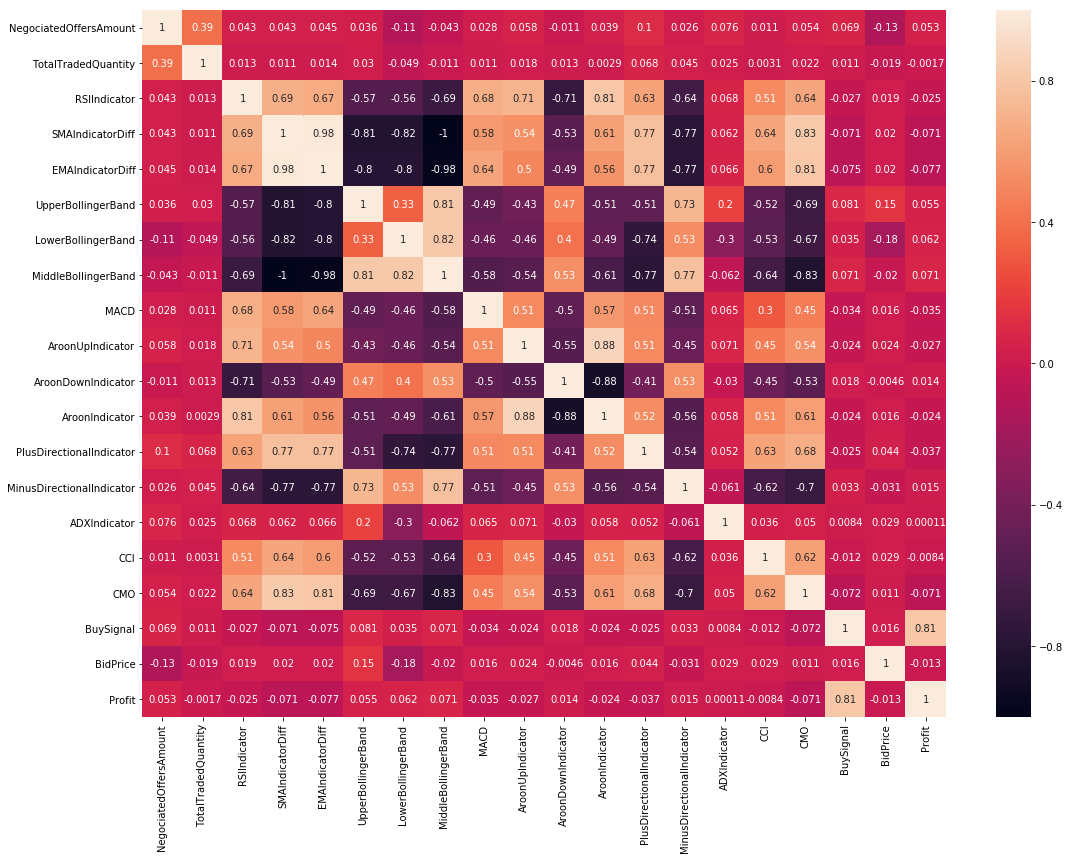

In [6]:
temp = data_frame.drop(["ROC"], axis=1)

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

In [7]:
x_train = data_frame.drop(["Start", "End"], axis=1)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,111,23900,0.632353,0.062143,0.030245,0.078226,-0.202511,-0.062143,0.038621,78.571429,...,71.428571,15.581217,14.039384,0.000000,24.199354,81.308411,0.0,0,39.93,-0.03
1,105,15900,0.614286,0.020714,0.000213,0.111128,-0.152557,-0.020714,0.035472,71.428571,...,64.285714,13.728422,14.982204,0.000000,27.690589,34.939759,0.0,0,39.90,-0.03
2,107,15200,0.589041,0.001429,-0.008482,0.114624,-0.117481,-0.001429,0.031802,64.285714,...,50.000000,12.171190,15.955015,28.238768,9.300680,2.857143,0.0,1,39.91,0.02
3,101,18900,0.557143,-0.034286,-0.033351,0.141190,-0.072619,0.034286,0.026171,57.142857,...,50.000000,10.471839,19.033114,27.198816,7.126966,-64.864865,0.0,1,39.88,0.02
4,93,19200,0.541667,-0.058571,-0.046238,0.153312,-0.036169,0.058571,0.019866,50.000000,...,42.857143,9.344656,16.984399,30.284531,-12.062985,-95.348837,0.0,1,39.86,0.02


In [8]:
x_train['NegociatedOffersAmount'] = np.log(x_train['NegociatedOffersAmount'])
x_train['TotalTradedQuantity'] = np.log(x_train['TotalTradedQuantity'])
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,4.709530,10.081634,0.632353,0.062143,0.030245,0.078226,-0.202511,-0.062143,0.038621,78.571429,...,71.428571,15.581217,14.039384,0.000000,24.199354,81.308411,0.0,0,39.93,-0.03
1,4.653960,9.674074,0.614286,0.020714,0.000213,0.111128,-0.152557,-0.020714,0.035472,71.428571,...,64.285714,13.728422,14.982204,0.000000,27.690589,34.939759,0.0,0,39.90,-0.03
2,4.672829,9.629051,0.589041,0.001429,-0.008482,0.114624,-0.117481,-0.001429,0.031802,64.285714,...,50.000000,12.171190,15.955015,28.238768,9.300680,2.857143,0.0,1,39.91,0.02
3,4.615121,9.846917,0.557143,-0.034286,-0.033351,0.141190,-0.072619,0.034286,0.026171,57.142857,...,50.000000,10.471839,19.033114,27.198816,7.126966,-64.864865,0.0,1,39.88,0.02
4,4.532599,9.862666,0.541667,-0.058571,-0.046238,0.153312,-0.036169,0.058571,0.019866,50.000000,...,42.857143,9.344656,16.984399,30.284531,-12.062985,-95.348837,0.0,1,39.86,0.02


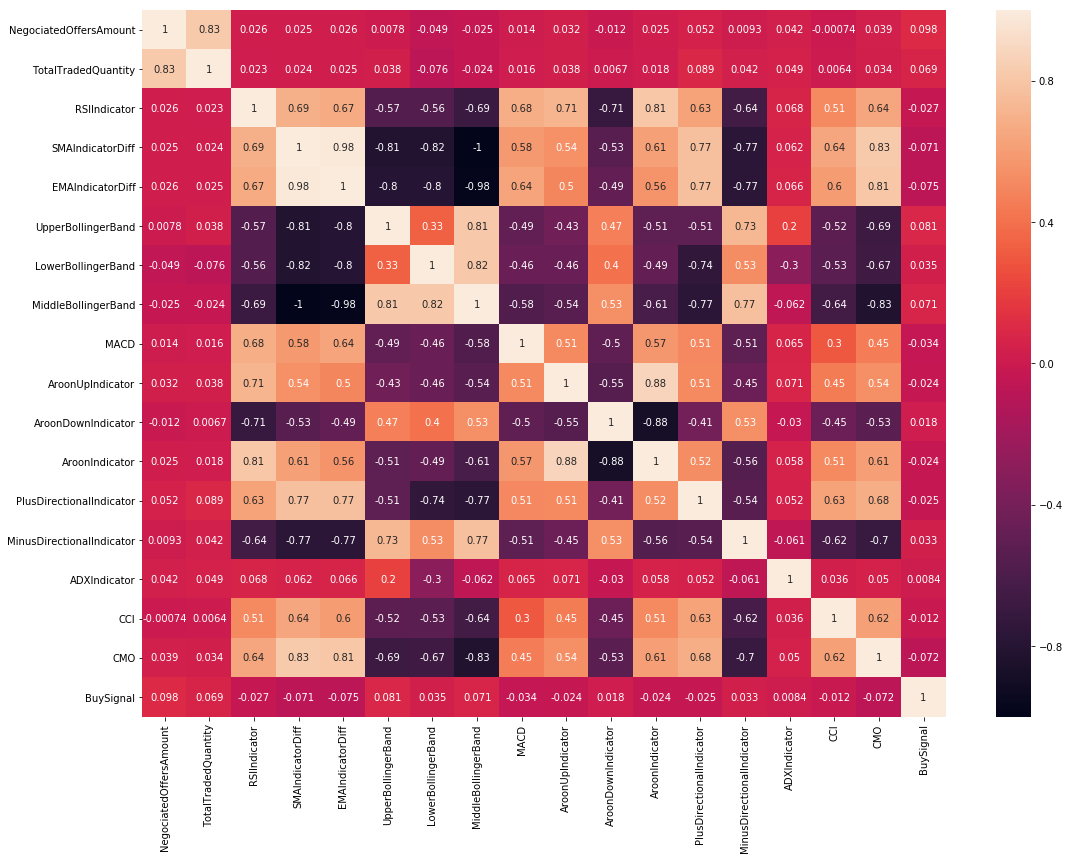

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

profit = x_train["Profit"]
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
x_train.head()

temp = x_train.drop(["ROC", "BidPrice","Profit"], axis=1)

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

x_train = x_train.dropna()
#y_train = x_train["BuySignal"]
#x_train = x_train.drop(["BidPrice"], axis=1)

Percorrendo blocos de N dias com M intervalos de 1 minuto para mensurar acurácia balanceada:

In [10]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from random import randint

average_data_per_day = 120
max_days_interval = 120
future_days_to_measure = 1
total_data = len(data_frame.index)
total_iterations = total_data//average_data_per_day
days = []
logreg_precisions = []
logreg_recalls = []
logreg_f1 = []
logreg_profit = []
logreg_random_profit = []
mlp_precisions = []
mlp_recalls = []
mlp_f1 = []
mlp_profit = []
mlp_random_profit = []

mlp_total_profit = []
logreg_total_profit = []
price_variation = []

for i in range(max_days_interval):
    day = i + 1
    print ("Days used to train: " + str(day))
    print ("Days to be predicted: " + str(future_days_to_measure))
    acc_mlp_score_arr = []
    acc_logreg_score_arr = []
    mlp_score_arr = []
    logreg_score_arr = []
    mlp_precision_arr = []
    logreg_precision_arr = []
    mlp_recall_arr = []
    logreg_recall_arr = []
    mlp_profit_arr = []
    logreg_profit_arr = []
    mlp_random_profit_arr = []
    logreg_random_profit_arr = []
    mlp_f1_arr = []
    logreg_f1_arr = []
    
    
    for j in range(total_iterations):
        min_range = j * average_data_per_day
        middle_range = min_range + day * average_data_per_day
        max_range = middle_range + average_data_per_day      
        
        if (day == 1): 
            start_price = x_train['BidPrice'].as_matrix()[middle_range]
            end_price = x_train['BidPrice'].as_matrix()[len(x_train.index) - 1]
            price_variation.append(end_price - start_price)
        
        if (len(x_train[min_range:middle_range].index) > 0 and len(x_train[middle_range:max_range].index) > 0):
                        
            day_mlp_profit_arr = []
            day_logreg_profit_arr = []
            day_random_mlp_profit_arr = []
            day_random_logreg_profit_arr = []
            #print("(MiddleRange,MaxRange): (" + str(middle_range) + "," + str (max_range) + ")")
            new_mlp = MLPClassifier(hidden_layer_sizes=[100], max_iter=1000)
            
            current_profit = profit[middle_range:max_range]
            
            #print ("Distribution before: " + str(len(x_train[min_range:middle_range][x_train[min_range:middle_range]['BuySignal'] == 1].index)/len(x_train[min_range:middle_range].index)))
            
            g = x_train[min_range:middle_range].groupby('BuySignal')
            x_train_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
            #print ("Distribution after: " + str(len(x_train_balanced[x_train_balanced['BuySignal'] == 1].index)/len(x_train_balanced.index)))
            
            new_mlp.fit(x_train_balanced.drop(["BuySignal", "Profit", "BidPrice"], axis=1), x_train_balanced["BuySignal"])
            y_predict = new_mlp.predict(x_train[middle_range:max_range].drop(["BuySignal", "Profit", "BidPrice"], axis=1))
            
            for s in range(len(y_predict)):
                if y_predict[s] == 1:
                    day_mlp_profit_arr.append(current_profit.as_matrix()[s])
                    day_random_mlp_profit_arr.append(current_profit.as_matrix()[randint(0, len(y_predict) - 1)])
            
            #print("MLP (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("MLP Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))
            mlp_precision_arr.append(precision_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            mlp_recall_arr.append(recall_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            mlp_f1_arr.append(f1_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            
            acc_mlp_score = accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            acc_mlp_score_arr.append(acc_mlp_score)
            mlp_score = balanced_accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            mlp_score_arr.append(mlp_score)
            
            new_logreg = LogisticRegression(C=100)
            new_logreg.fit(x_train_balanced.drop(["BuySignal", "Profit", "BidPrice"], axis=1), x_train_balanced["BuySignal"])
            y_predict = new_logreg.predict(x_train[middle_range:max_range].drop(["BuySignal", "Profit", "BidPrice"], axis=1))
            
            for s in range(len(y_predict)):
                if y_predict[s] == 1:
                    day_logreg_profit_arr.append(current_profit.as_matrix()[s])
                    day_random_logreg_profit_arr.append(current_profit.as_matrix()[randint(0, len(y_predict) - 1)])
                  
            #print("LogReg (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("LogReg Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))     
            logreg_precision_arr.append(precision_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            logreg_recall_arr.append(recall_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            logreg_f1_arr.append(f1_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            
            acc_logreg_score = accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            acc_logreg_score_arr.append(acc_logreg_score)
            logreg_score = balanced_accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            logreg_score_arr.append(logreg_score)
            
            mlp_profit_arr.append(np.sum(day_mlp_profit_arr))
            logreg_profit_arr.append(np.sum(day_logreg_profit_arr))
            mlp_random_profit_arr.append(np.sum(day_random_mlp_profit_arr))
            logreg_random_profit_arr.append(np.sum(day_random_logreg_profit_arr))
                                                        
      
    print ("MLP Average Accuracy Score: " + str(np.sum(acc_mlp_score_arr)/len(acc_mlp_score_arr)))
    print ("MLP Average Balanced Accuracy Score: " + str(np.sum(mlp_score_arr)/len(mlp_score_arr)))  
    print ("MLP Average Precision Score: " + str(np.sum(mlp_precision_arr)/len(mlp_precision_arr)))
    print ("MLP Average Recall Score: " + str(np.sum(mlp_recall_arr)/len(mlp_recall_arr)))
    print ("MLP Average f1 Score: " + str(np.sum(mlp_f1_arr)/len(mlp_f1_arr)))
    print ("MLP Average Profit: " + str(np.sum(mlp_profit_arr)/len(mlp_profit_arr)))
    print ("MLP Random Average Profit: " + str(np.sum(mlp_random_profit_arr)/len(mlp_random_profit_arr)))
      
    print ("LogReg Average Accuracy Score: " + str(np.sum(acc_logreg_score_arr)/len(acc_logreg_score_arr))) 
    print ("LogReg Average Balanced Accuracy Score: " + str(np.sum(logreg_score_arr)/len(logreg_score_arr)))  
    print ("LogReg Average Precision Score: " + str(np.sum(logreg_precision_arr)/len(logreg_precision_arr)))
    print ("LogReg Average Recall Score: " + str(np.sum(logreg_recall_arr)/len(logreg_recall_arr)))
    print ("LogReg Average f1 Score: " + str(np.sum(logreg_f1_arr)/len(logreg_f1_arr)))
    print ("LogReg Average Profit: " + str(np.sum(logreg_profit_arr)/len(logreg_profit_arr)))
    print ("LogReg Random Average Profit: " + str(np.sum(logreg_random_profit_arr)/len(logreg_random_profit_arr)))
    
    logreg_precisions.append(np.sum(logreg_precision_arr)/len(logreg_precision_arr))
    logreg_recalls.append(np.sum(logreg_recall_arr)/len(logreg_recall_arr))
    logreg_f1.append(np.sum(logreg_f1_arr)/len(logreg_f1_arr))
    logreg_profit.append(np.sum(logreg_profit_arr)/len(logreg_profit_arr))
    logreg_total_profit.append(np.sum(logreg_profit_arr))
    logreg_random_profit.append(np.sum(logreg_random_profit_arr)/len(logreg_random_profit_arr))
                                                        
    mlp_precisions.append(np.sum(mlp_precision_arr)/len(mlp_precision_arr))
    mlp_recalls.append(np.sum(mlp_recall_arr)/len(mlp_recall_arr))
    mlp_f1.append(np.sum(mlp_f1_arr)/len(mlp_f1_arr))
    mlp_profit.append(np.sum(mlp_profit_arr)/len(mlp_profit_arr))
    mlp_total_profit.append(np.sum(mlp_profit_arr))
    mlp_random_profit.append(np.sum(mlp_random_profit_arr)/len(mlp_random_profit_arr))
    days.append(day)

Days used to train: 1
Days to be predicted: 1
MLP Average Accuracy Score: 0.5182104988052569
MLP Average Balanced Accuracy Score: 0.5179023791604895
MLP Average Precision Score: 0.5177893771490728
MLP Average Recall Score: 0.4996255531953365
MLP Average f1 Score: 0.4939063985403863
MLP Average Profit: 0.15756944444444404
MLP Random Average Profit: 0.12083333333333256
LogReg Average Accuracy Score: 0.524908527479092
LogReg Average Balanced Accuracy Score: 0.5230038219192565
LogReg Average Precision Score: 0.5264772732021712
LogReg Average Recall Score: 0.5121045337267522
LogReg Average f1 Score: 0.501937561224453
LogReg Average Profit: 0.17562499999999936
LogReg Random Average Profit: 0.12083333333333195
Days used to train: 2
Days to be predicted: 1
MLP Average Accuracy Score: 0.5197514850740658
MLP Average Balanced Accuracy Score: 0.5211524889097797
MLP Average Precision Score: 0.5117400209584001
MLP Average Recall Score: 0.5112767034396541
MLP Average f1 Score: 0.4860342186627796
MLP 

MLP Average Accuracy Score: 0.5399417562724014
MLP Average Balanced Accuracy Score: 0.5364263162626963
MLP Average Precision Score: 0.5386299411722381
MLP Average Recall Score: 0.5467102636653653
MLP Average f1 Score: 0.5312568230838532
MLP Average Profit: 0.21689393939393856
MLP Random Average Profit: 0.17681818181817965
LogReg Average Accuracy Score: 0.5461999022482893
LogReg Average Balanced Accuracy Score: 0.542882551735709
LogReg Average Precision Score: 0.5461699775711514
LogReg Average Recall Score: 0.5407962335847941
LogReg Average f1 Score: 0.5296360717396458
LogReg Average Profit: 0.2428030303030294
LogReg Random Average Profit: 0.17212121212121137
Days used to train: 14
Days to be predicted: 1
MLP Average Accuracy Score: 0.5429902322908972
MLP Average Balanced Accuracy Score: 0.5410323877708367
MLP Average Precision Score: 0.5415156853147645
MLP Average Recall Score: 0.552798402005961
MLP Average f1 Score: 0.5330934937312991
MLP Average Profit: 0.24213740458015173
MLP Random

MLP Average Accuracy Score: 0.546913082437276
MLP Average Balanced Accuracy Score: 0.5428836047418505
MLP Average Precision Score: 0.550199925395796
MLP Average Recall Score: 0.5664285496961585
MLP Average f1 Score: 0.5441259664393638
MLP Average Profit: 0.2553333333333336
MLP Random Average Profit: 0.12358333333333182
LogReg Average Accuracy Score: 0.5531115591397849
LogReg Average Balanced Accuracy Score: 0.5476762657138318
LogReg Average Precision Score: 0.5552379449404253
LogReg Average Recall Score: 0.5583984339583395
LogReg Average f1 Score: 0.5441351495268907
LogReg Average Profit: 0.26816666666666705
LogReg Random Average Profit: 0.1408333333333313
Days used to train: 26
Days to be predicted: 1
MLP Average Accuracy Score: 0.5479985542604138
MLP Average Balanced Accuracy Score: 0.5451349696495201
MLP Average Precision Score: 0.5500670890297507
MLP Average Recall Score: 0.5578625860396018
MLP Average f1 Score: 0.5377763556895915
MLP Average Profit: 0.24907563025210092
MLP Random 

MLP Average Accuracy Score: 0.5477474113898845
MLP Average Balanced Accuracy Score: 0.5445049455990658
MLP Average Precision Score: 0.5540400647338174
MLP Average Recall Score: 0.5552326519297639
MLP Average f1 Score: 0.5343741032146105
MLP Average Profit: 0.2553703703703703
MLP Random Average Profit: 0.13648148148147998
LogReg Average Accuracy Score: 0.5557721027479091
LogReg Average Balanced Accuracy Score: 0.5479334730548489
LogReg Average Precision Score: 0.558020808556649
LogReg Average Recall Score: 0.5633529576979633
LogReg Average f1 Score: 0.5492432464022711
LogReg Average Profit: 0.2815740740740737
LogReg Random Average Profit: 0.15861111111111018
Days used to train: 38
Days to be predicted: 1
MLP Average Accuracy Score: 0.5485830569791981
MLP Average Balanced Accuracy Score: 0.5434330657205311
MLP Average Precision Score: 0.5486563034942695
MLP Average Recall Score: 0.5830285403515539
MLP Average f1 Score: 0.5517288732977164
MLP Average Profit: 0.2662616822429906
MLP Random 

MLP Average Accuracy Score: 0.5439068100358423
MLP Average Balanced Accuracy Score: 0.5373225196178875
MLP Average Precision Score: 0.5465226970444589
MLP Average Recall Score: 0.5966443220367201
MLP Average f1 Score: 0.5559325004630309
MLP Average Profit: 0.25437500000000063
MLP Random Average Profit: 0.14687499999999948
LogReg Average Accuracy Score: 0.557448476702509
LogReg Average Balanced Accuracy Score: 0.5474565023958455
LogReg Average Precision Score: 0.5589001497846404
LogReg Average Recall Score: 0.5792856563526062
LogReg Average f1 Score: 0.5603155672095653
LogReg Average Profit: 0.2865625000000002
LogReg Random Average Profit: 0.16854166666666467
Days used to train: 50
Days to be predicted: 1
MLP Average Accuracy Score: 0.5502461799660441
MLP Average Balanced Accuracy Score: 0.5442653945792165
MLP Average Precision Score: 0.553757326804405
MLP Average Recall Score: 0.5877308916742482
MLP Average f1 Score: 0.5552313776544755
MLP Average Profit: 0.27715789473684216
MLP Random

MLP Average Accuracy Score: 0.5482942908346133
MLP Average Balanced Accuracy Score: 0.5418674986015554
MLP Average Precision Score: 0.5541270078950086
MLP Average Recall Score: 0.5889285011187634
MLP Average f1 Score: 0.5577184118514269
MLP Average Profit: 0.27797619047619004
MLP Random Average Profit: 0.175119047619047
LogReg Average Accuracy Score: 0.5595174091141832
LogReg Average Balanced Accuracy Score: 0.5494487239167692
LogReg Average Precision Score: 0.5636287279941993
LogReg Average Recall Score: 0.5844436484596733
LogReg Average f1 Score: 0.5650880766357504
LogReg Average Profit: 0.3034523809523803
LogReg Random Average Profit: 0.18369047619047377
Days used to train: 62
Days to be predicted: 1
MLP Average Accuracy Score: 0.5556030573908536
MLP Average Balanced Accuracy Score: 0.5447726557975239
MLP Average Precision Score: 0.5573165422460615
MLP Average Recall Score: 0.5943371769380625
MLP Average f1 Score: 0.560599631441812
MLP Average Profit: 0.29530120481927735
MLP Random 

MLP Average Accuracy Score: 0.5497311827956989
MLP Average Balanced Accuracy Score: 0.5444216622177172
MLP Average Precision Score: 0.5555426098331179
MLP Average Recall Score: 0.6098661065718853
MLP Average f1 Score: 0.5689895853993594
MLP Average Profit: 0.29916666666666647
MLP Random Average Profit: 0.18222222222222081
LogReg Average Accuracy Score: 0.563519265232975
LogReg Average Balanced Accuracy Score: 0.5528132230792058
LogReg Average Precision Score: 0.5657210858815892
LogReg Average Recall Score: 0.5914797247162779
LogReg Average f1 Score: 0.5698705176296501
LogReg Average Profit: 0.31874999999999987
LogReg Random Average Profit: 0.20541666666666403
Days used to train: 74
Days to be predicted: 1
MLP Average Accuracy Score: 0.5554937149780401
MLP Average Balanced Accuracy Score: 0.5464244534715715
MLP Average Precision Score: 0.5583679327273566
MLP Average Recall Score: 0.5998231151305401
MLP Average f1 Score: 0.5649519023274611
MLP Average Profit: 0.3138028169014075
MLP Rando

MLP Average Accuracy Score: 0.5548342293906809
MLP Average Balanced Accuracy Score: 0.5436796207888558
MLP Average Precision Score: 0.5486388114826135
MLP Average Recall Score: 0.5989865934048788
MLP Average f1 Score: 0.5606468121456082
MLP Average Profit: 0.28183333333333277
MLP Random Average Profit: 0.219333333333333
LogReg Average Accuracy Score: 0.5629077060931899
LogReg Average Balanced Accuracy Score: 0.5525950088200202
LogReg Average Precision Score: 0.5578764925915428
LogReg Average Recall Score: 0.6035961327655254
LogReg Average f1 Score: 0.5712265973089877
LogReg Average Profit: 0.31283333333333235
LogReg Random Average Profit: 0.20816666666666483
Days used to train: 86
Days to be predicted: 1
MLP Average Accuracy Score: 0.5496901767814836
MLP Average Balanced Accuracy Score: 0.5450868917715928
MLP Average Precision Score: 0.5469621126418048
MLP Average Recall Score: 0.6158702474776455
MLP Average f1 Score: 0.5687714313893224
MLP Average Profit: 0.2864406779661017
MLP Random

MLP Average Accuracy Score: 0.5550011200716846
MLP Average Balanced Accuracy Score: 0.5461899102677493
MLP Average Precision Score: 0.545255811613513
MLP Average Recall Score: 0.6250945745044019
MLP Average f1 Score: 0.566578180352319
MLP Average Profit: 0.29791666666666616
MLP Random Average Profit: 0.1708333333333324
LogReg Average Accuracy Score: 0.5676971326164875
LogReg Average Balanced Accuracy Score: 0.555086503680169
LogReg Average Precision Score: 0.5543550825495339
LogReg Average Recall Score: 0.6324752380885323
LogReg Average f1 Score: 0.5824640550031847
LogReg Average Profit: 0.32874999999999993
LogReg Random Average Profit: 0.20062499999999872
Days used to train: 98
Days to be predicted: 1
MLP Average Accuracy Score: 0.5641500800732098
MLP Average Balanced Accuracy Score: 0.5519615355325546
MLP Average Precision Score: 0.5579143381823337
MLP Average Recall Score: 0.6117321403842797
MLP Average f1 Score: 0.5660108280275176
MLP Average Profit: 0.31148936170212715
MLP Random 

MLP Average Accuracy Score: 0.5647700119474313
MLP Average Balanced Accuracy Score: 0.553461492690796
MLP Average Precision Score: 0.543480570833606
MLP Average Recall Score: 0.624694725785909
MLP Average f1 Score: 0.5692823799496822
MLP Average Profit: 0.29666666666666697
MLP Random Average Profit: 0.21888888888889055
LogReg Average Accuracy Score: 0.5675776583034647
LogReg Average Balanced Accuracy Score: 0.5566863765089477
LogReg Average Precision Score: 0.5452680454056349
LogReg Average Recall Score: 0.6425259296729756
LogReg Average f1 Score: 0.5818406927186448
LogReg Average Profit: 0.31083333333333385
LogReg Random Average Profit: 0.19916666666666508
Days used to train: 110
Days to be predicted: 1
MLP Average Accuracy Score: 0.5559062980030722
MLP Average Balanced Accuracy Score: 0.5493911307195668
MLP Average Precision Score: 0.5437007343599856
MLP Average Recall Score: 0.5933767767760062
MLP Average f1 Score: 0.5497787020743189
MLP Average Profit: 0.2831428571428571
MLP Random

In [11]:
def performance_plot(days, precision, recall, f1, figsize, title, precision_xytextpos, recall_xytextpos, f1_xytextpos):

    plt.figure(1, figsize=figsize)

    plt.subplot(111)
    lines = plt.plot(days, precision, days, recall, days, f1)
    plt.setp(lines[0], linewidth=2)
    plt.setp(lines[1], linewidth=2)
    plt.setp(lines[2], linewidth=2)
    plt.legend(('Precisões', 'Realocações', 'F1'),
            loc='lower right')
    plt.title(title)

    xy_precision = (precision.index(max(precision)) + 1, max(precision))
    xy_recall = (recall.index(max(recall)) + 1, max(recall))
    xy_f1 = (f1.index(max(f1)) + 1, max(f1))

    plt.annotate(str(xy_precision), xy=xy_precision, xytext=precision_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.annotate(str(xy_recall), xy=xy_recall, xytext=recall_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.annotate(str(xy_f1), xy=xy_f1, xytext=f1_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )
    
    plt.ylim(0.5, .7)
    plt.ylabel('Performance')
    plt.xlabel('Dias de Treino')
    plt.xlim(1,120)
    plt.show()

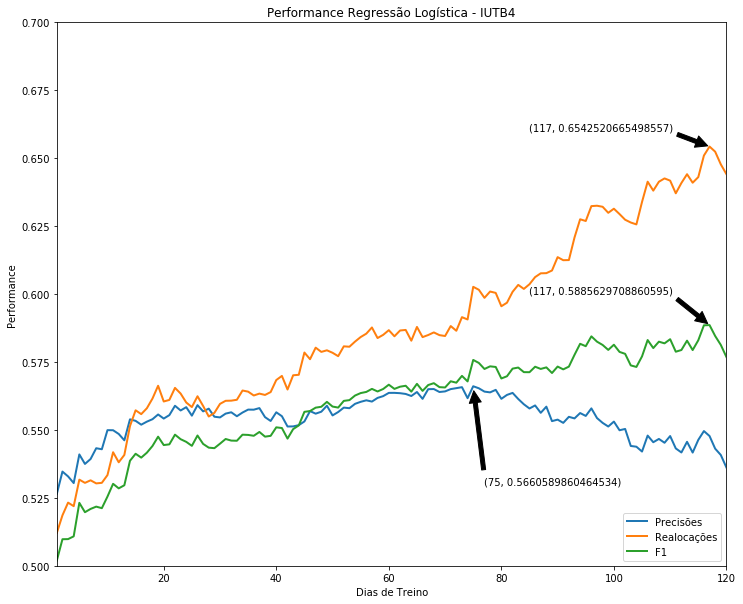

In [12]:
performance_plot(days, logreg_precisions, logreg_recalls, logreg_f1,(12,10), 'Performance Regressão Logística - IUTB4', (77, 0.53),(85, 0.66),(85, 0.6))

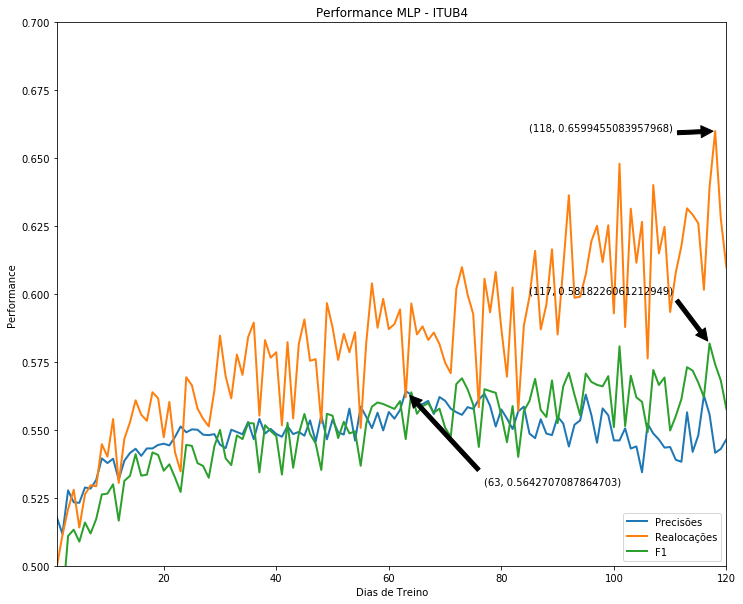

In [13]:
performance_plot(days, mlp_precisions, mlp_recalls, mlp_f1, (12,10), 'Performance MLP - ITUB4', (77, 0.53),(85, 0.66),(85, 0.6))

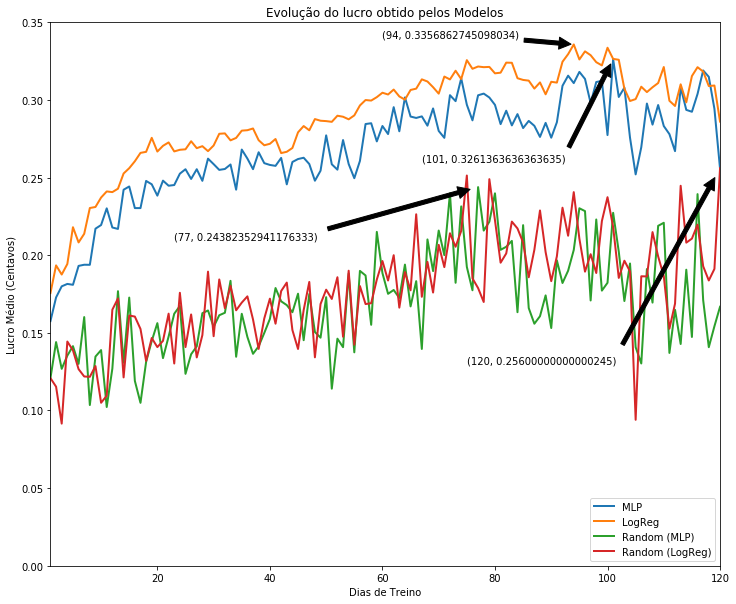

In [21]:
plt.figure(1, figsize=(12,10))

plt.subplot(111)
lines = plt.plot(days, mlp_profit, days, logreg_profit, days, mlp_random_profit, days, logreg_random_profit)
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], linewidth=2)
plt.setp(lines[2], linewidth=2)
plt.setp(lines[3], linewidth=2)
plt.legend(('MLP', 'LogReg', 'Random (MLP)', 'Random (LogReg)'),
        loc='lower right')
plt.title("Evolução do lucro obtido pelos Modelos")

xy_mlp = (mlp_profit.index(max(mlp_profit)) + 1, max(mlp_profit))
xy_logreg = (logreg_profit.index(max(logreg_profit)) + 1, max(logreg_profit))

xy_random_mlp = (mlp_random_profit.index(max(mlp_random_profit)) + 1, max(mlp_random_profit))
xy_random_logreg = (logreg_random_profit.index(max(logreg_random_profit)) + 1, max(logreg_random_profit))

plt.annotate(str(xy_mlp), xy=xy_mlp, xytext=(67,0.26),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_logreg), xy=xy_logreg, xytext=(60,0.34),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_random_mlp), xy=xy_random_mlp, xytext=(23,0.21),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_random_logreg), xy=xy_random_logreg, xytext=(75,0.13),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-0.0, 0.35)
plt.xlim(1,120)
plt.ylabel('Lucro Médio (Centavos)')
plt.xlabel('Dias de Treino')
plt.show()

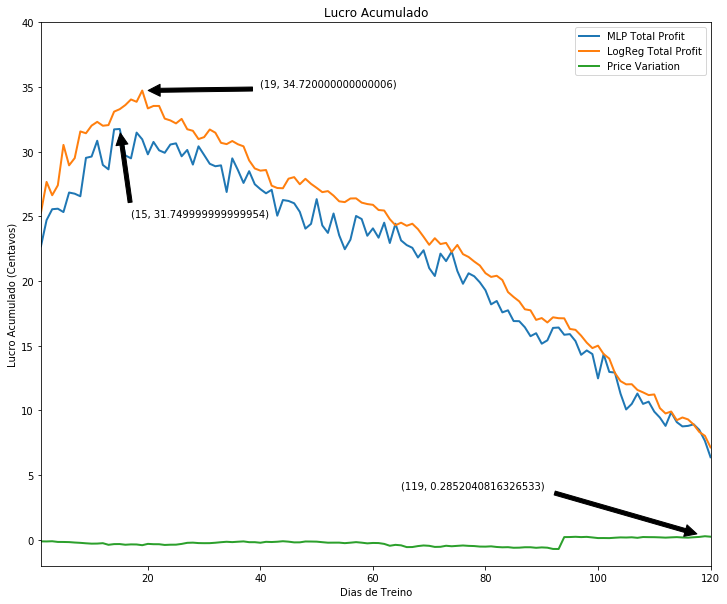

In [25]:
pv = price_variation[:120]

plt.figure(1, figsize=(12,10))

plt.subplot(111)
lines = plt.plot(days, mlp_total_profit, days, logreg_total_profit, days, pv)
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], linewidth=2)
plt.setp(lines[2], linewidth=2)
plt.legend(('MLP Total Profit', 'LogReg Total Profit', 'Price Variation'),
        loc='upper right')
plt.title("Lucro Acumulado")

xy_mlp = (mlp_total_profit.index(max(mlp_total_profit)) + 1, max(mlp_total_profit))
xy_logreg = (logreg_total_profit.index(max(logreg_total_profit)) + 1, max(logreg_total_profit))

xy_random_mlp = (pv.index(max(pv)) + 1, max(pv))

plt.annotate(str(xy_mlp), xy=xy_mlp, xytext=(17,25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_logreg), xy=xy_logreg, xytext=(40,35),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_random_mlp), xy=xy_random_mlp, xytext=(65,4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2, 40)
plt.xlim(1,120)
plt.ylabel('Lucro Acumulado (Centavos)')
plt.xlabel('Dias de Treino')
plt.show()